# Lesson 08

## Тема “Обучение без учителя”

### Задание 1

#### [Зд 1] Импортируйте библиотеки pandas и numpy.

In [1]:
import numpy as np
import pandas as pd

___

#### [Зд 1] Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

___

#### [Зд 1] Создайте датафреймы X и Y из этих данных.

In [4]:
data = boston["data"]
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)

In [5]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

___

#### [Зд 1] Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42

In [6]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
325,24.6
335,21.1
56,24.7
437,8.7
409,27.5


___

#### [Зд 1] Масштабируйте данные с помощью StandardScaler.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

___

#### [Зд 1] Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.


In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


___

#### [Зд 1] Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

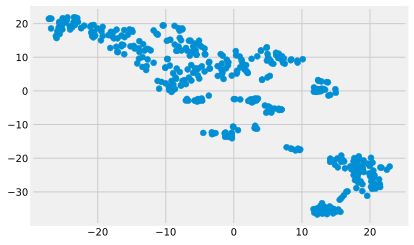

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

___

### Задание 2

#### [Зд 2] С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random state random_state сделайте равным 42.

In [34]:
from sklearn.cluster import KMeans
model_KMeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
X_train_KMeans = model_KMeans.fit_transform(X_train)

___

#### [Зд 2] Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE

In [35]:
X_train_tsne_kmeans = tsne.fit_transform(X_train_KMeans)
print('До:\t{}'.format(X_train_KMeans.shape))
print('После:\t{}'.format(X_train_tsne_kmeans.shape))

До:	(404, 3)
После:	(404, 2)


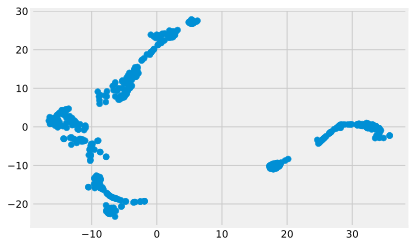

In [36]:
plt.scatter(X_train_tsne_kmeans[:, 0], X_train_tsne_kmeans[:, 1])
plt.show()

#### [Зд 2] Вычислите средние значения price и CRIM в разных кластерах.

In [40]:
train_labels = model_KMeans.fit_predict(X_train_tsne_kmeans)
train_labels.shape

(404,)

In [44]:
res  = X_train[['CRIM']].copy()
res['price'] = y_train
res['train_labels'] = train_labels

res.groupby('train_labels').mean()

,CRIM,price
train_labels,,
0,0.144963,27.066667
1,12.804150,16.225000
2,0.638807,23.509524


---

### Задание 3

#### [Зд 3] Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

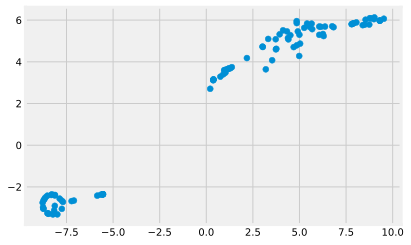

In [46]:
X_test_KMeans = model_KMeans.fit_transform(X_test)
X_test_tsne_kmeans = tsne.fit_transform(X_test_KMeans)

plt.scatter(X_test_tsne_kmeans[:, 0], X_test_tsne_kmeans[:, 1])
plt.show()

In [48]:
test_labels = model_KMeans.fit_predict(X_test_tsne_kmeans)
test_labels.shape

res  = X_test[['CRIM']].copy()
res['price'] = y_test
res['train_labels'] = test_labels

res.groupby('train_labels').mean()

,CRIM,price
train_labels,,
0,0.152591,26.490698
1,10.707682,16.421212
2,0.401602,19.646154
